In [1]:
import cobra

from cobra.io import read_sbml_model, write_sbml_model
from cobra.flux_analysis import flux_variability_analysis
from cobra.flux_analysis.loopless import add_loopless, loopless_solution
import pandas

%matplotlib inline

In [2]:
modelB = cobra.io.read_sbml_model("../SBMLs/cobraB_May16_div50_NormalObj.xml")
modelA = cobra.io.read_sbml_model("../SBMLs/cobraA_May16_div50_NormalObj.xml")
modelC = cobra.io.read_sbml_model("../SBMLs/cobraC_May12_div50_NormalObj.xml")

#modelC = cobra.io.load_matlab_model("pruned_model_C_Recon22_v2.mat")

Academic license - for non-commercial use only - expires 2021-07-16
Using license file C:\Users\santi\gurobi\gurobi.lic


In [ ]:
###########PARENTHESIS

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from time import time
from cobra.flux_analysis import production_envelope

In [36]:
cs_data = cobra.flux_analysis.phenotype_phase_plane.find_carbon_sources(modelC)
cs_data

[<Reaction EX_arg_L_b at 0x284183ddf48>,
 <Reaction EX_asp_L_b at 0x284183defc8>,
 <Reaction EX_chol_b at 0x284183df808>,
 <Reaction EX_cys_L_b at 0x284183dfdc8>,
 <Reaction EX_fol_b at 0x284183dff48>,
 <Reaction EX_gal_b at 0x284183e0388>,
 <Reaction EX_glu_L_b at 0x284183e05c8>,
 <Reaction EX_gly_b at 0x284183e0888>,
 <Reaction EX_his_L_b at 0x284183e1188>,
 <Reaction EX_ile_L_b at 0x284183e12c8>,
 <Reaction EX_inost_b at 0x284183e1408>,
 <Reaction EX_leu_L_b at 0x284183e1788>,
 <Reaction EX_lys_L_b at 0x284183e1a08>,
 <Reaction EX_met_L_b at 0x284183e1b88>,
 <Reaction EX_phe_L_b at 0x284183e2448>,
 <Reaction EX_pyr_b at 0x284183e2bc8>,
 <Reaction EX_ser_L_b at 0x284183e3048>,
 <Reaction EX_thr_L_b at 0x284183e3a08>,
 <Reaction EX_trp_L_b at 0x284183e3c88>,
 <Reaction EX_tyr_L_b at 0x284183e3f08>,
 <Reaction EX_val_L_b at 0x284183e41c8>]

In [12]:
for i in modelC.reactions:
    if 'biomass' in i.id:
        print(i.id)

EX_biomass_c
biomass_reaction
biomass_protein
biomass_DNA
biomass_RNA
biomass_carbohydrate
biomass_lipid
biomass_other


In [28]:
modelC.objective.expression

1.0*biomass_reaction - 1.0*biomass_reaction_reverse_32a6c

In [68]:
#prod_env = production_envelope(com, [pairs_med_50[0][0],pairs_med_50[0][1]], carbon_sources=cs_data)
prod_env = production_envelope(modelC, reactions=['EX_o2_b','EX_leu_L_b'], objective='EX_co2_b', carbon_sources='EX_gal_b')

In [69]:
prod_env

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_b,EX_leu_L_b
0,EX_gal_b,0.000000,0.00000,0.000000,1.023409,1.536650,2.252290,-0.200000,-0.152600
1,EX_gal_b,0.000000,0.00000,0.000000,1.028680,1.544564,2.263889,-0.200000,-0.144568
2,EX_gal_b,0.000000,0.00000,0.000000,1.033017,1.551077,2.273435,-0.200000,-0.136537
3,EX_gal_b,0.000000,0.00000,0.000000,1.037269,1.557461,2.282792,-0.200000,-0.128505
4,EX_gal_b,0.000000,0.00000,0.000000,1.041521,1.563845,2.292150,-0.200000,-0.120474
...,...,...,...,...,...,...,...,...,...
395,EX_gal_b,NaN,NaN,NaN,NaN,NaN,NaN,0.025535,-0.032126
396,EX_gal_b,NaN,NaN,NaN,NaN,NaN,NaN,0.025535,-0.024095
397,EX_gal_b,NaN,NaN,NaN,NaN,NaN,NaN,0.025535,-0.016063
398,EX_gal_b,NaN,NaN,NaN,NaN,NaN,NaN,0.025535,-0.008032


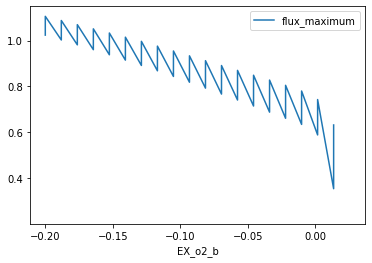

In [70]:
prod_env.plot(
    kind='line', x='EX_o2_b', y='flux_maximum');

In [73]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

%matplotlib

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(prod_env['EX_o2_b'], prod_env['EX_leu_L_b'], prod_env.flux_maximum, cmap=cm.coolwarm,
                       norm=colors.LogNorm(vmin=0.7, vmax=1), linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')
plt.show()

Using matplotlib backend: TkAgg


In [ ]:
###########PARENTHESIS

In [62]:
print(solA.fluxes['EX_lac_L_b'])

0.0


In [63]:
solA = modelA.optimize()
print(modelA.summary(fva=True),end='\n\n')

print(solA.fluxes['EX_o2_b'])


cobra\core\summary\summary.py:206 UserWarning: Setting float_format to anything other than None will cause nan to be present in the output.


IN_FLUXES IN_FLUXES IN_FLUXES IN_FLUXES OUT_FLUXES OUT_FLUXES OUT_FLUXES OUT_FLUXES     OBJECTIVES    OBJECTIVES
    ID       FLUX    FLUX_MIN  FLUX_MAX     ID        FLUX     FLUX_MIN   FLUX_MAX          ID           FLUX   
     o2_b       0.2     0.114      0.2       co2_b    0.242           0     0.526    biomass_reaction  0.00523  
  inost_b     0.111     0.111    0.111     lac_D_b    0.181           0     0.393                          nan  
  arg_L_b    0.0668   0.00188    0.115         h_b    0.144           0     0.581                          nan  
  tyr_L_b    0.0356   0.00148     0.11      urea_b   0.0649           0     0.113                          nan  
  ser_L_b     0.028   0.00253     0.19      ptrc_b    0.058           0     0.221                          nan  
  glu_L_b    0.0221    -0.084    0.137     asp_L_b   0.0418      -0.151     0.245                          nan  
     pi_b    0.0065    0.0065   0.0065   acetone_b   0.0305           0    0.0432               

In [64]:
for i in modelA.medium.keys():
    print(i, solA.fluxes[i])

EX_ala_L_b 0.0
EX_arg_L_b -0.06681441607722946
EX_asp_L_b 0.04176923488684521
EX_ca2_b 0.0
EX_chol_b -0.000899951194425732
EX_cl_b 0.0
EX_cys_L_b -0.0002437487762181194
EX_fol_b 0.0
EX_gal_b 0.0
EX_glu_L_b -0.02209688409734055
EX_gly_b 0.02214284363602664
EX_his_L_b -0.0018434171797186577
EX_ile_L_b -0.0014973191449717538
EX_inost_b -0.111
EX_leu_L_b -0.0028553114036209844
EX_lys_L_b -0.003099054945921508
EX_met_L_b -0.0008008940700628418
EX_na1_b 0.0
EX_ncam_b 0.0
EX_o2_b -0.2
EX_phe_L_b -0.0013580445978251558
EX_pi_b -0.006498552463427242
EX_pnto_R_b 0.0
EX_pydxn_b 0.0
EX_pyr_b 0.0
EX_ribflv_b 0.0
EX_ser_L_b -0.028020569730256545
EX_so4_b 0.0
EX_thm_b 0.0
EX_thr_L_b -0.0016365936921183518
EX_trp_L_b -6.96425074908912e-05
EX_tyr_L_b -0.035632998285277405
EX_val_L_b -0.0018455316824262115


In [65]:
for r in modelA.exchanges:
    for i in modelA.medium.keys():
        if i[:-2] in r.id and 'LPAREN' in r.id:
            print(r.id)

In [66]:
for r in modelA.exchanges:
    print(r.id,solA.fluxes[r.id])

EX_34hpp_b 0.0036559019064634143
EX_Lcystin_b 0.0
EX_Rtotal_b 0.0
EX_abt_b 0.0
EX_ac_b 0.0
EX_acac_b 0.0
EX_acetone_b 0.03050073383988414
EX_ach_b 0.0
EX_aicar_b 0.0
EX_akg_b 0.0
EX_ala_L_b 0.0
EX_arg_L_b -0.06681441607722946
EX_asp_L_b 0.04176923488684521
EX_atp_b 0.0
EX_biomass_c 0.0052339175928822505
EX_ca2_b 0.0
EX_cbasp_b 0.0
EX_chol_b -0.000899951194425732
EX_chsterol_b 0.0
EX_cit_b 0.0
EX_cl_b 0.0
EX_co2_b 0.2422332504277645
EX_cys_L_b -0.0002437487762181194
EX_datp_b 0.0
EX_dctp_b 0.0
EX_dgtp_b 0.0
EX_dttp_b 0.0
EX_fol_b 0.0
EX_fum_b 0.0
EX_gal_b 0.0
EX_gln_L_b 0.0
EX_glu_L_b -0.02209688409734055
EX_gly_b 0.02214284363602664
EX_h2o2_b 0.02548573110084774
EX_h2o_b 0.0
EX_h_b 0.14364290250738282
EX_hco3_b 0.0
EX_his_L_b -0.0018434171797186577
EX_ile_L_b -0.0014973191449717538
EX_inost_b -0.111
EX_lac_D_b 0.1808320768759325
EX_lac_L_b 0.004761403679612544
EX_leu_L_b -0.0028553114036209844
EX_lys_L_b -0.003099054945921508
EX_mal_L_b 0.0
EX_met_L_b -0.0008008940700628418
EX_na1_b 0.

In [67]:
loopless = loopless_solution(modelA)

In [68]:
for i in modelA.medium.keys():
    print(i, loopless.fluxes[i])

EX_ala_L_b 0.0
EX_arg_L_b -0.06681441607722946
EX_asp_L_b 0.04176923488684521
EX_ca2_b 0.0
EX_chol_b -0.000899951194425732
EX_cl_b 0.0
EX_cys_L_b -0.0002437487762181194
EX_fol_b 0.0
EX_gal_b 0.0
EX_glu_L_b -0.02209688409734055
EX_gly_b 0.022142843636026636
EX_his_L_b -0.0018434171797186737
EX_ile_L_b -0.0014973191449717538
EX_inost_b -0.111
EX_leu_L_b -0.0028553114036209844
EX_lys_L_b -0.0030990549459215086
EX_met_L_b -0.0008008940700628418
EX_na1_b 0.0
EX_ncam_b 0.0
EX_o2_b -0.2
EX_phe_L_b -0.0013580445978251558
EX_pi_b -0.006498552463427265
EX_pnto_R_b 0.0
EX_pydxn_b 0.0
EX_pyr_b 0.0
EX_ribflv_b 0.0
EX_ser_L_b -0.02802056973025655
EX_so4_b 0.0
EX_thm_b 0.0
EX_thr_L_b -0.0016365936921183518
EX_trp_L_b -6.96425074908912e-05
EX_tyr_L_b -0.035632998285277405
EX_val_L_b -0.0018455316824262115


<AxesSubplot:xlabel='loopless', ylabel='nominal'>

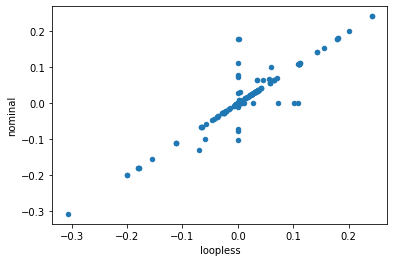

In [69]:
df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=solA.fluxes))
df.plot.scatter(x='loopless', y='nominal')

In [8]:
#flux_variability_analysis(modelA, reaction_list=modelA.reactions[0:10], loopless=True)

In [70]:
solB = modelB.optimize()
print(modelB.summary(fva=True),end='\n\n')

print(solB.fluxes['EX_o2_LPAREN_e_RPAREN_'])

cobra\core\summary\summary.py:206 UserWarning: Setting float_format to anything other than None will cause nan to be present in the output.


IN_FLUXES IN_FLUXES IN_FLUXES IN_FLUXES OUT_FLUXES OUT_FLUXES OUT_FLUXES OUT_FLUXES     OBJECTIVES    OBJECTIVES
    ID       FLUX    FLUX_MIN  FLUX_MAX     ID        FLUX     FLUX_MIN   FLUX_MAX          ID           FLUX   
     o2_b     0.143      0.14      0.2         h_b    0.182          0      0.422    biomass_reaction  0.00531  
  his_L_b     0.129  0.000671    0.129     lac_L_b    0.152          0      0.412                          nan  
  inost_b     0.111     0.111    0.111       co2_b    0.143          0      0.503                          nan  
  tyr_L_b     0.015    0.0138     0.11      hco3_b    0.131          0      0.327                          nan  
     pi_b   0.00659   0.00659  0.00659     hista_b    0.128          0      0.128                          nan  
  thr_L_b   0.00499   0.00166    0.168       pyr_b   0.0305     -0.182       0.34                          nan  
  asp_L_b   0.00492   0.00492  0.00492     ala_L_b   0.0126    -0.0469      0.169               

In [71]:
for i in modelB.medium.keys():
    print(i, solB.fluxes[i])

EX_ala_L_b 0.012580225702943214
EX_arg_L_b -0.004095234862623925
EX_asp_L_b -0.004918198028851974
EX_ca2_b 0.0
EX_chol_b -0.0009124306809142118
EX_cl_b 0.0
EX_cys_L_b -0.0002471288034665287
EX_fol_b 0.0
EX_gal_b -0.001460294505721459
EX_glu_L_b -0.0037775349750642628
EX_gly_b -0.003389242777429295
EX_his_L_b -0.129
EX_ile_L_b -0.001518082242075637
EX_inost_b -0.111
EX_leu_L_b -0.002894905573063282
EX_lys_L_b -0.0031420290700342754
EX_met_L_b -0.0008119999464569841
EX_na1_b 0.0
EX_ncam_b 0.0
EX_o2_b -0.14255930894369176
EX_phe_L_b -0.0013768763959429707
EX_pi_b -0.006588666903148166
EX_pnto_R_b 0.0
EX_pydxn_b 0.0
EX_pyr_b 0.03047148133930236
EX_ribflv_b 0.0
EX_ser_L_b -0.0025699888515787624
EX_so4_b 0.0
EX_thm_b 0.0
EX_thr_L_b -0.004993062067831289
EX_trp_L_b -0.0011605358795587278
EX_tyr_L_b -0.015020709531039622
EX_val_L_b -0.0018711233898849654


In [23]:
for r in modelB.reactions:
    for i in modelB.medium.keys():
        if i[:-2] in r.id and 'LPAREN' in r.id:
            print(r.id)

EX_ala_L_LPAREN_e_RPAREN_
EX_arg_L_LPAREN_e_RPAREN_
EX_asp_L_LPAREN_e_RPAREN_
EX_ca2_LPAREN_e_RPAREN_
EX_chol_LPAREN_e_RPAREN_
EX_cl_LPAREN_e_RPAREN_
EX_cys_L_LPAREN_e_RPAREN_
EX_fol_LPAREN_e_RPAREN_
EX_gal_LPAREN_e_RPAREN_
EX_glu_L_LPAREN_e_RPAREN_
EX_gly_LPAREN_e_RPAREN_
EX_glyb_LPAREN_e_RPAREN_
EX_his_L_LPAREN_e_RPAREN_
EX_ile_L_LPAREN_e_RPAREN_
EX_inost_LPAREN_e_RPAREN_
EX_leu_L_LPAREN_e_RPAREN_
EX_lys_L_LPAREN_e_RPAREN_
EX_met_L_LPAREN_e_RPAREN_
EX_na1_LPAREN_e_RPAREN_
EX_ncam_LPAREN_e_RPAREN_
EX_o2_LPAREN_e_RPAREN_
EX_phe_L_LPAREN_e_RPAREN_
EX_pi_LPAREN_e_RPAREN_
EX_pnto_R_LPAREN_e_RPAREN_
EX_pydxn_LPAREN_e_RPAREN_
EX_pyr_LPAREN_e_RPAREN_
EX_ribflv_LPAREN_e_RPAREN_
EX_ser_L_LPAREN_e_RPAREN_
EX_so4_LPAREN_e_RPAREN_
EX_thm_LPAREN_e_RPAREN_
EX_thr_L_LPAREN_e_RPAREN_
EX_trp_L_LPAREN_e_RPAREN_
EX_tyr_L_LPAREN_e_RPAREN_
EX_val_L_LPAREN_e_RPAREN_
EX_glyc3p_LPAREN_e_RPAREN_


In [11]:
looplessB = loopless_solution(modelB)

In [12]:
for i in modelB.medium.keys():
    print(i, looplessB.fluxes[i])

EX_ala_L_b 0.008481679587106997
EX_arg_L_b -0.0027301565750825502
EX_asp_L_b -0.0032787986859014236
EX_ca2_b 0.0
EX_chol_b -0.0014070774308530903
EX_cl_b 0.0
EX_cys_L_b -0.058855962795888804
EX_fol_b 0.0
EX_gal_b -0.0009735296704809481
EX_glu_L_b -0.0025183566500427777
EX_gly_b -0.005280801481611972
EX_his_L_b -0.00044719606688286754
EX_ile_L_b -0.0010120548280503992
EX_inost_b -0.074
EX_leu_L_b -0.0019299370487088057
EX_lys_L_b -0.002094686046689464
EX_met_L_b -0.0005413332976379756
EX_na1_b 0.0
EX_ncam_b 0.0
EX_o2_b -0.12441964519623529
EX_phe_L_b -0.0009179175972952907
EX_pi_b -0.004392444602099011
EX_pnto_R_b 0.0
EX_pydxn_b 0.0
EX_pyr_b 0.07151333197244775
EX_ribflv_b 0.0
EX_ser_L_b -0.0017133259010524951
EX_so4_b -0.05869121026024446
EX_thm_b 0.0
EX_thr_L_b -0.0011061920588055075
EX_trp_L_b -0.0007736905863726496
EX_tyr_L_b -0.009309878495594165
EX_val_L_b -0.001247415593256612


<AxesSubplot:xlabel='loopless', ylabel='nominal'>

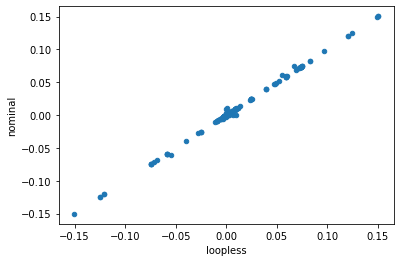

In [13]:
df = pandas.DataFrame(dict(loopless=looplessB.fluxes, nominal=solB.fluxes))
df.plot.scatter(x='loopless', y='nominal')

In [14]:
solC = modelC.optimize()
print(modelC.summary(fva=True),end='\n\n')

print(solC.fluxes['EX_o2_LPAREN_e_RPAREN_'])

cobra\core\summary\summary.py:206 UserWarning: Setting float_format to anything other than None will cause nan to be present in the output.


IN_FLUXES IN_FLUXES IN_FLUXES IN_FLUXES OUT_FLUXES OUT_FLUXES OUT_FLUXES OUT_FLUXES     OBJECTIVES    OBJECTIVES
    ID       FLUX    FLUX_MIN  FLUX_MAX     ID        FLUX     FLUX_MIN   FLUX_MAX          ID           FLUX   
     o2_b      0.2       0.2       0.2      hco3_b    0.316      0.287      0.316    biomass_reaction   0.0223  
    pyr_b    0.182    0.0893     0.182       nh4_b    0.303      0.303      0.426                          nan  
  cys_L_b    0.151    0.0328     0.151    mthgxl_b    0.261      0.261      0.275                          nan  
  glu_L_b    0.137     0.137     0.137      succ_b    0.112      0.112      0.112                          nan  
  ser_L_b   0.0979    0.0979      0.19   Lcystin_b    0.075     0.0159      0.075                          nan  
  thr_L_b    0.091    0.0763     0.091      glyb_b   0.0427     0.0427      0.087                          nan  
  leu_L_b   0.0609    0.0609     0.105      4mop_b   0.0397     0.0397      0.084               

In [15]:
for i in modelC.medium.keys():
    print(i, solC.fluxes[i])

EX_ala_L_b -0.017486620854499396
EX_arg_L_b -0.007998680190203139
EX_asp_L_b -0.020635152162682472
EX_ca2_b 0.0
EX_chol_b -0.04652730125665466
EX_cl_b 0.0
EX_cys_L_b -0.15096289789207618
EX_fol_b 0.0
EX_gal_b 0.0
EX_glu_L_b -0.1368
EX_gly_b -0.0029638487602293294
EX_his_L_b -0.002814432897744189
EX_ile_L_b -0.006369377133032664
EX_inost_b -0.021012910907845125
EX_leu_L_b -0.06086834132495404
EX_lys_L_b -0.01318292748266209
EX_met_L_b -0.0034068864964228824
EX_na1_b 0.0
EX_ncam_b 0.0
EX_o2_b -0.2
EX_phe_L_b -0.005776923534353969
EX_pi_b -0.02764389382007662
EX_pnto_R_b 0.0
EX_pydxn_b 0.0
EX_pyr_b -0.1818
EX_ribflv_b 0.0
EX_ser_L_b -0.09788587587478369
EX_so4_b 0.0
EX_thm_b 0.0
EX_thr_L_b -0.09103589115436372
EX_trp_L_b -0.0002962490636609781
EX_tyr_L_b -0.0035549442352884758
EX_val_L_b -0.007850622451337563


In [16]:
looplessC = loopless_solution(modelC)

In [17]:
for i in modelC.medium.keys():
    print(i, looplessC.fluxes[i])

EX_ala_L_b -0.017486620854499473
EX_arg_L_b -0.007998680190203174
EX_asp_L_b -0.020635152162682403
EX_ca2_b 0.0
EX_chol_b -0.04652730125665447
EX_cl_b 0.0
EX_cys_L_b -0.15096289789207942
EX_fol_b 0.0
EX_gal_b 0.0
EX_glu_L_b -0.1368
EX_gly_b -0.002963848760229426
EX_his_L_b -0.002814432897744101
EX_ile_L_b -0.0063693771330326915
EX_inost_b -0.02101291090784505
EX_leu_L_b -0.06086834132495366
EX_lys_L_b -0.013182927482662149
EX_met_L_b -0.0034068864964228976
EX_na1_b 0.0
EX_ncam_b 0.0
EX_o2_b -0.2
EX_phe_L_b -0.005776923534353994
EX_pi_b -0.027643893820076273
EX_pnto_R_b 0.0
EX_pydxn_b 0.0
EX_pyr_b -0.1818
EX_ribflv_b 0.0
EX_ser_L_b -0.09788587587478405
EX_so4_b 0.0
EX_thm_b 0.0
EX_thr_L_b -0.09103589115436383
EX_trp_L_b -0.00029624906366097943
EX_tyr_L_b -0.00355494423528848
EX_val_L_b -0.007850622451337597


<AxesSubplot:xlabel='loopless', ylabel='nominal'>

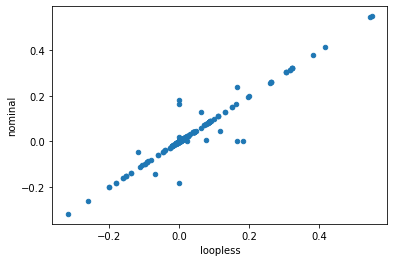

In [18]:
df = pandas.DataFrame(dict(loopless=looplessC.fluxes, nominal=solC.fluxes))
df.plot.scatter(x='loopless', y='nominal')

In [34]:
for j in modelA.exchanges:
    t = j.id
    if solA.fluxes[t]>=0:
        x=t[3:len(t)-2]
        print(t, solA.fluxes[t], x)
        for i in modelA.reactions:
            if x in i.reaction:
                print('- ',i.id, i.reaction)
        print('-----------------------------------------------',end='\n\n')

EX_2hb_b 0.0 2hb
-  EX_2hb_b 2hb_b --> 
-  2HBO 2hb_c + nad_c <=> 2obut_c + h_c + nadh_c
-  r2092 2hb_c + retn_e <=> 2hb_e + retn_c
-  r2109 2hb_c + akg_e <=> 2hb_e + akg_c
-  EX_2hb_LPAREN_e_RPAREN_ 2hb_e <=> 2hb_b
-----------------------------------------------

EX_Lcystin_b 0.0 Lcystin
-  EX_Lcystin_b Lcystin_b --> 
-  CYSGLTH Lcystin_c + 2.0 gthrd_c <=> 2.0 cys_L_c + gthox_c
-  r0027 2.0 cys_L_c + nadp_c <=> Lcystin_c + h_c + nadph_c
-  DM_Lcystin Lcystin_c --> Lcystin_b
-----------------------------------------------

EX_abt_b 0.0 abt
-  EX_abt_b abt_b --> 
-  ABTD abt_c + nad_c <=> h_c + nadh_c + xylu_L_c
-  ABTti abt_c --> abt_e
-  EX_abt_LPAREN_e_RPAREN_ abt_e <=> abt_b
-----------------------------------------------

EX_ac_b 0.0 ac
-  EX_ac_b ac_b --> 
-  EX_acac_b acac_b --> 
-  EX_acetone_b acetone_b --> 
-  EX_lac_L_b lac_L_b --> 
-  2AMACHYD 2amac_c + h2o_c --> nh4_c + pyr_c
-  ACACT10m 2maacoa_m + coa_m <=> accoa_m + ppcoa_m
-  ACACT1rm 2.0 accoa_m --> aacoa_m + coa_m
-  

-  DCTPtm dctp_c --> dctp_m
-  DM_dctp_m_ dctp_m --> dctp_b
-  biomass_DNA 0.941642857142857 datp_n + 0.674428571428572 dctp_n + 0.707 dgtp_n + 0.935071428571429 dttp_n --> biomass_DNA_c
-----------------------------------------------

EX_dgtp_b 0.0 dgtp
-  EX_dgtp_b dgtp_b --> 
-  CYTK10 cmp_c + dgtp_c <=> cdp_c + dgdp_c
-  UMPK7 dgtp_c + ump_c <=> dgdp_c + udp_c
-  r0413 dgdp_c + h_c + pep_c --> dgtp_c + pyr_c
-  r0472 dgtp_c + h2o_c + trdox_c <=> gtp_c + trdrd_c
-  DGTPtn dgtp_c <=> dgtp_n
-  DGTPtm dgtp_c --> dgtp_m
-  DM_dgtp_m_ dgtp_m --> dgtp_b
-  biomass_DNA 0.941642857142857 datp_n + 0.674428571428572 dctp_n + 0.707 dgtp_n + 0.935071428571429 dttp_n --> biomass_DNA_c
-----------------------------------------------

EX_dttp_b 0.0 dttp
-  EX_dttp_b dttp_b --> 
-  RE0453C datp_c + dtdp_c <=> dadp_c + dttp_c
-  DTTPtn dttp_c <=> dttp_n
-  DTTPtm dttp_c --> dttp_m
-  DM_dttp_m_ dttp_m --> dttp_b
-  biomass_DNA 0.941642857142857 datp_n + 0.674428571428572 dctp_n + 0.707 dgtp_n + 0.9

-  H2CO3D co2_c + h2o_c <=> h_c + hco3_c
-  H2CO3Dm co2_m + h2o_m <=> h_m + hco3_m
-  H2O2syn h_c + nadph_c + o2_c --> h2o2_c + nadp_c
-  HMGCOASim aacoa_m + accoa_m + h2o_m --> coa_m + h_m + hmgcoa_m
-  IMPC h2o_c + imp_c <=> fprica_c
-  IMPD h2o_c + imp_c + nad_c --> h_c + nadh_c + xmp_c
-  INOSTO inost_c + o2_c --> glcur_c + h2o_c + h_c
-  IZPN 4izp_c + h2o_c --> forglu_c + h_c
-  LPS2 dag_hs_c + h2o_c --> Rtotal_c + h_c + mag_hs_c
-  LPS3e h2o_e + mag_hs_e --> Rtotal_e + glyc_e + h_e
-  LSTO2r h_r + lthstrl_r + nadph_r + o2_r --> 7dhchsterol_r + 2.0 h2o_r + nadp_r
-  MI145PP h2o_c + mi145p_c --> mi14p_c + pi_c
-  MI14P4P h2o_c + mi14p_c --> mi1p_D_c + pi_c
-  MI1PP h2o_c + mi1p_D_c --> inost_c + pi_c
-  MTHFC h2o_c + methf_c <=> 10fthf_c + h_c
-  NACASPAH Nacasp_c + h2o_c --> ac_c + asp_L_c
-  NAGLCAly core6_l + h2o_l --> Tn_antigen_l + acgam_l
-  NDP7g h2o_g + udp_g --> h_g + pi_g + ump_g
-  NTD10 h2o_c + xmp_c --> pi_c + xtsn_c
-  P45027A15m h_m + nadph_m + o2_m + xol7ah3_m --> 2

-  CHOLPtl cholp_c <=> cholp_l
-  CHOLt4 chol_e + na1_e <=> chol_c + na1_c
-  CHOLtr chol_r <=> chol_c
-  CHOLtu chol_e <=> chol_c
-  CYOOm2 4.0 focytC_m + 4.0 h_m + o2_m --> 4.0 ficytC_m + 2.0 h2o_m
-  CYOR_u10m 2.0 ficytC_m + 2.0 h_m + q10h2_m --> 2.0 focytC_m + 4.0 h_i + q10_m
-  DHFtm dhf_c <=> dhf_m
-  DHORD9 dhor_S_c + q10_m --> orot_c + q10h2_m
-  FADH2tru fadh2_c --> fadh2_r
-  GALt2_2 gal_e + 2.0 h_e <=> gal_c + 2.0 h_c
-  GLNtN1 gln_L_e + h_c + 2.0 na1_e <=> gln_L_c + h_e + 2.0 na1_c
-  H2O2t h2o2_e <=> h2o2_c
-  H2O2tm h2o2_c --> h2o2_m
-  H2O2tp h2o2_c <=> h2o2_x
-  H2Oter h2o_c <=> h2o_r
-  H2Otg h2o_c <=> h2o_g
-  H2Otly h2o_c <=> h2o_l
-  H2Otm h2o_c <=> h2o_m
-  H2Otn h2o_n <=> h2o_c
-  H2Otp h2o_c <=> h2o_x
-  HIStiDF his_L_e --> his_L_c
-  HIStN1 h_c + his_L_e + 2.0 na1_e <=> h_e + his_L_c + 2.0 na1_c
-  HMGCOAtm hmgcoa_c <=> hmgcoa_m
-  HPYRtp hpyr_c <=> hpyr_x
-  Htg h_g <=> h_c
-  Htr h_c <=> h_r
-  Htx h_c <=> h_x
-  INSTt2r h_e + inost_e <=> h_c + inost_c
-  KCC2

-  ORPT orot5p_c + ppi_c <=> orot_c + prpp_c
-  DHORD9 dhor_S_c + q10_m --> orot_c + q10h2_m
-  r0839 orot_e <=> orot_c
-  OROTGLUt glu_L_c + orot_e <=> glu_L_e + orot_c
-  EX_orot_LPAREN_e_RPAREN_ orot_e <=> orot_b
-----------------------------------------------

EX_oxa_b 0.010677962105665436 oxa
-  EX_oxa_b oxa_b --> 
-  GLXO1 glx_c + h2o_c + nad_c --> 2.0 h_c + nadh_c + oxa_c
-  CLOXAtex2 2.0 cl_e + oxa_c --> 2.0 cl_c + oxa_e
-  SO4OXAtex2 oxa_c + 2.0 so4_e --> oxa_e + 2.0 so4_c
-  r2374 cit_m + oxa_c <=> cit_c + oxa_m
-  r2376 icit_m + oxa_c <=> icit_c + oxa_m
-  r2420 oxa_c + pi_m <=> oxa_m + pi_c
-  EX_oxa_LPAREN_e_RPAREN_ oxa_e <=> oxa_b
-----------------------------------------------

EX_pe_hs_b 0.0 pe_hs
-  EX_pe_hs_b pe_hs_b --> 
-  PSDm_hs h_m + ps_hs_m --> co2_m + pe_hs_m
-  PE_HStm pe_hs_c <=> pe_hs_m
-  PEt pe_hs_e <=> pe_hs_c
-  EX_pe_hs_LPAREN_e_RPAREN_ pe_hs_e <=> pe_hs_b
-  biomass_lipid 0.210319587628866 chsterol_c + 0.120185567010309 clpn_hs_c + 0.240360824742268 pa

In [35]:
for j in modelB.exchanges:
    t = j.id
    if solB.fluxes[t]>=0:
        x=t[3:len(t)-2]
        print(t, solB.fluxes[t], x)
        for i in modelB.reactions:
            if x in i.reaction:
                print('- ',i.id, i.reaction)
        print('-----------------------------------------------',end='\n\n')

EX_34hpp_b 9.486245181125792e-05 34hpp
-  EX_34hpp_b 34hpp_b --> 
-  34HPPOR 34hpp_c + o2_c --> co2_c + hgentis_c
-  TYRTA akg_c + tyr_L_c <=> 34hpp_c + glu_L_c
-  34HPPte 34hpp_e <=> 34hpp_c
-  EX_34hpp_ 34hpp_e <=> 34hpp_b
-----------------------------------------------

EX_Lcystin_b 0.0 Lcystin
-  EX_Lcystin_b Lcystin_b --> 
-  CYSGLTH Lcystin_c + 2.0 gthrd_c <=> 2.0 cys_L_c + gthox_c
-  r0027 2.0 cys_L_c + nadp_c <=> Lcystin_c + h_c + nadph_c
-  DM_Lcystin Lcystin_c --> Lcystin_b
-----------------------------------------------

EX_abt_b 0.0 abt
-  EX_abt_b abt_b --> 
-  ABTD abt_c + nad_c <=> h_c + nadh_c + xylu_L_c
-  ABTti abt_c --> abt_e
-  EX_abt_LPAREN_e_RPAREN_ abt_e <=> abt_b
-----------------------------------------------

EX_ac_b 0.0 ac
-  EX_ac_b ac_b --> 
-  EX_acac_b acac_b --> 
-  EX_acald_b acald_b --> 
-  EX_acetone_b acetone_b --> 
-  2AMACHYD 2amac_c + h2o_c --> nh4_c + pyr_c
-  AACOAT acac_c + atp_c + coa_c --> aacoa_c + amp_c + ppi_c
-  ACACT1r 2.0 accoa_c <=> aa

-  EX_cl_b cl_b <=> 
-  CLS_hs cdpdag_hs_c + h_c + pglyc_hs_c --> clpn_hs_c + cmp_c
-  GCALDD gcald_c + h2o_c + nad_c --> glyclt_c + 2.0 h_c + nadh_c
-  GLYCTO1p glyclt_x + o2_x --> glx_x + h2o2_x
-  CLFORtex cl_e + 2.0 for_c --> cl_c + 2.0 for_e
-  CLOXAtex2 2.0 cl_e + oxa_c --> 2.0 cl_c + oxa_e
-  GLYCLTtp glyclt_c --> glyclt_x
-  GLYt7_311_r cl_e + gly_e + 3.0 na1_e <=> cl_c + gly_c + 3.0 na1_c
-  EX_cl_LPAREN_e_RPAREN_ cl_e <=> cl_b
-  biomass_lipid 0.210319587628866 chsterol_c + 0.120185567010309 clpn_hs_c + 0.240360824742268 pail_hs_c + 1.59237113402062 pchol_hs_c + 0.570865979381443 pe_hs_c + 0.0300412371134021 pglyc_hs_c + 0.0600927835051546 ps_hs_c + 0.180268041237113 sphmyln_hs_c --> biomass_lipid_c
-  CLCFTRte cl_c <=> cl_e
-  GLUB0AT3tc cl_e + glu_L_e + na1_e --> cl_c + glu_L_c + na1_c
-  ILEB0AT3tc cl_e + ile_L_e + na1_e --> cl_c + ile_L_c + na1_c
-  LEUB0AT3tc cl_e + leu_L_e + na1_e --> cl_c + leu_L_c + na1_c
-  METB0AT3tc cl_e + met_L_e + na1_e --> cl_c + met_L_c + na1_c

-  EX_thr_L_b thr_L_b <=> 
-  EX_whhdca_b whhdca_b --> 
-  2AMACHYD 2amac_c + h2o_c --> nh4_c + pyr_c
-  2DR1PP 2dr1p_c + h2o_c --> drib_c + pi_c
-  34HPPOR 34hpp_c + o2_c --> co2_c + hgentis_c
-  3DSPHR 3dsphgn_c + h_c + nadph_c --> nadp_c + sphgn_c
-  3SALACBOXL 3sala_c + 2.0 h_c --> co2_c + hyptaur_c
-  ABTD abt_c + nad_c <=> h_c + nadh_c + xylu_L_c
-  ACCOAC accoa_c + atp_c + hco3_c --> adp_c + h_c + malcoa_c + pi_c
-  ACOAHi accoa_c + h2o_c --> ac_c + coa_c + h_c
-  ADCim acac_m + h_m --> acetone_m + co2_m
-  ADSK aps_c + atp_c --> adp_c + h_c + paps_c
-  ADSS asp_L_c + gtp_c + imp_c --> dcamp_c + gdp_c + 2.0 h_c + pi_c
-  AGPAT1 Rtotalcoa_c + alpa_hs_c --> coa_c + 6.0 h_c + pa_hs_c
-  AICART 10fthf_c + aicar_c <=> fprica_c + thf_c
-  ARGN arg_L_c + h2o_c --> orn_c + urea_c
-  R_group_phosphotase_3 Rtotal_c + atp_c + coa_c + 4.0 h_c --> Rtotalcoa_c + amp_c + ppi_c
-  ARTPLM3 Rtotalcoa_c <=> 4.0 h_c + pmtcoa_c
-  ASNS1 asp_L_c + atp_c + gln_L_c + h2o_c --> amp_c + asn_L_c + glu_L_c

-  RNDR3 cdp_c + trdrd_c --> dcdp_c + h2o_c + trdox_c
-  SADT atp_c + h_c + so4_c --> aps_c + ppi_c
-  SERHL ser_L_c --> 2amac_c + h2o_c
-  SERPT h_c + pmtcoa_c + ser_L_c --> 3dsphgn_c + co2_c + coa_c
-  SMS crm_hs_c + h_c + pchol_hs_c --> dag_hs_c + sphmyln_hs_c
-  SPHMDAc h2o_c + sphmyln_hs_c --> Rtotal_c + h_c + spc_hs_c
-  SPTix pyr_x + ser_L_x --> ala_L_x + hpyr_x
-  SQLEr h_r + nadph_r + o2_r + sql_r --> Ssq23epx_r + h2o_r + nadp_r
-  SQLSr 2.0 frdp_r + h_r + nadph_r --> nadp_r + 2.0 ppi_r + sql_r
-  THRD_L thr_L_c --> 2obut_c + nh4_c
-  TMDS dump_c + mlthf_c --> dhf_c + dtmp_c
-  TPI dhap_c <=> g3p_c
-  TRDR h_c + nadph_c + trdox_c --> nadp_c + trdrd_c
-  TYRTA akg_c + tyr_L_c <=> 34hpp_c + glu_L_c
-  UDPDOLPT_U dolp_U_c + h_c + udpg_c --> dolglcp_U_c + udp_c
-  XYLK atp_c + xylu_D_c --> adp_c + h_c + xu5p_D_c
-  XYLTD_Dr nad_c + xylt_c <=> h_c + nadh_c + xylu_D_c
-  r0009 h2o_x + ppi_x --> h_x + 2.0 pi_x
-  r0021 2.0 gthrd_c + nad_c <=> gthox_c + h_c + nadh_c
-  r0027 2.0 cys_L

-  EX_pglyc_hs_LPAREN_e_RPAREN_ pglyc_hs_e <=> pglyc_hs_b
-  EX_phe_L_LPAREN_e_RPAREN_ phe_L_e <=> phe_L_b
-  EX_spc_hs_LPAREN_e_RPAREN_ spc_hs_e <=> spc_hs_b
-  EX_thm_LPAREN_e_RPAREN_ thm_e <=> thm_b
-  EX_thr_L_LPAREN_e_RPAREN_ thr_L_e <=> thr_L_b
-  EX_whhdca_LPAREN_e_RPAREN_ whhdca_e <=> whhdca_b
-  EX_34hpp_ 34hpp_e <=> 34hpp_b
-  biomass_reaction 0.014 biomass_DNA_c + 0.058 biomass_RNA_c + 0.071 biomass_carbohydrate_c + 0.097 biomass_lipid_c + 0.054 biomass_other_c + 0.706 biomass_protein_c --> biomass_c
-  biomass_protein 0.716189801699717 ala_L_c + 0.508866855524079 arg_L_c + 0.395779036827196 asn_L_c + 0.499447592067989 asp_L_c + 29.2504249291785 atp_c + 0.0659645892351275 cys_L_c + 0.461756373937677 gln_L_c + 0.546558073654391 glu_L_c + 0.763300283286119 gly_c + 29.2504249291785 h2o_c + 0.179050991501416 his_L_c + 0.405212464589235 ile_L_c + 0.77271954674221 leu_L_c + 0.838682719546742 lys_L_c + 0.216742209631728 met_L_c + 0.367521246458923 phe_L_c + 0.584249291784703 pro_L_

-  3SALACBOXL 3sala_c + 2.0 h_c --> co2_c + hyptaur_c
-  HYPTROX 2.0 hyptaur_c + o2_c --> 2.0 taur_c
-  DM_taur_LPAREN_c_RPAREN_ taur_c --> taur_b
-----------------------------------------------

EX_thm_b 0.0 thm
-  EX_thm_b thm_b <=> 
-  EX_thm_LPAREN_e_RPAREN_ thm_e <=> thm_b
-----------------------------------------------

EX_urea_b 0.0014592155182964195 urea
-  EX_urea_b urea_b --> 
-  ARGN arg_L_c + h2o_c --> orn_c + urea_c
-  UREAt urea_e <=> urea_c
-  UREAt5 h2o_e + urea_e <=> h2o_c + urea_c
-  EX_urea_LPAREN_e_RPAREN_ urea_e <=> urea_b
-----------------------------------------------

EX_utp_b 0.0 utp
-  EX_utp_b utp_b --> 
-  CTPS1 atp_c + nh4_c + utp_c --> adp_c + ctp_c + 2.0 h_c + pi_c
-  GALT gal1p_c + h_c + utp_c <=> ppi_c + udpgal_c
-  NDPK6 atp_c + dudp_c <=> adp_c + dutp_c
-  UMPK3 ump_c + utp_c <=> 2.0 udp_c
-  r0165 h_c + pep_c + udp_c --> pyr_c + utp_c
-  r0191 f6p_c + utp_c --> fdp_c + h_c + udp_c
-  r0409 s7p_c + utp_c <=> HC00361_c + h_c + udp_c
-  r1156 dutp_c + u

In [36]:
for j in modelC.exchanges:
    t = j.id
    if solC.fluxes[t]>=0:
        x=t[3:len(t)-2]
        print(t, solC.fluxes[t], x)
        for i in modelC.reactions:
            if x in i.reaction:
                print('- ',i.id, i.reaction)
        print('-----------------------------------------------',end='\n\n')

EX_4mop_b 0.03970298660688157 4mop
-  EX_4mop_b 4mop_b --> 
-  LEUTA akg_c + leu_L_c <=> 4mop_c + glu_L_c
-  LEUTAm akg_m + leu_L_m <=> 4mop_m + glu_L_m
-  OIVD1m 4mop_m + coa_m + nad_m --> co2_m + ivcoa_m + nadh_m
-  4MOPte 4mop_e <=> 4mop_c
-  EX_4mop_LPAREN_e_RPAREN_ 4mop_e <=> 4mop_b
-----------------------------------------------

EX_Lcystin_b 0.07496301308463138 Lcystin
-  EX_Lcystin_b Lcystin_b --> 
-  CYSGLTH Lcystin_c + 2.0 gthrd_c <=> 2.0 cys_L_c + gthox_c
-  r0027 2.0 cys_L_c + nadp_c <=> Lcystin_c + h_c + nadph_c
-  DM_Lcystin Lcystin_c --> Lcystin_b
-----------------------------------------------

EX_Rtotal_b 0.0 Rtotal
-  EX_Rtotal_b Rtotal_b --> 
-  AGPAT1 Rtotalcoa_c + alpa_hs_c --> coa_c + 6.0 h_c + pa_hs_c
-  ARTCOAL3 Rtotalcoa_c + h2o_c --> Rtotal_c + coa_c + 5.0 h_c
-  R_group_phosphotase_3 Rtotal_c + atp_c + coa_c + 4.0 h_c --> Rtotalcoa_c + amp_c + ppi_c
-  ARTPLM3 Rtotalcoa_c <=> 4.0 h_c + pmtcoa_c
-  DSAT Rtotalcoa_c + sphgn_c --> coa_c + dhcrm_hs_c + 5.0 h_c
- 

-  FAS180COA 3.0 h_c + malcoa_c + 2.0 nadph_c + pmtcoa_c --> co2_c + coa_c + h2o_c + 2.0 nadp_c + stcoa_c
-  FAS80COA_L accoa_c + 9.0 h_c + 3.0 malcoa_c + 6.0 nadph_c --> 3.0 co2_c + 3.0 coa_c + 3.0 h2o_c + 6.0 nadp_c + occoa_c
-  FDH for_c + nad_c --> co2_c + nadh_c
-  FTHFDH 10fthf_c + h2o_c + nadp_c --> co2_c + h_c + nadph_c + thf_c
-  H2CO3Dm co2_m + h2o_m <=> h_m + hco3_m
-  HPYRDC h_c + hpyr_c --> co2_c + gcald_c
-  MCD h_c + malcoa_c --> accoa_c + co2_c
-  MMSAD3m coa_m + msa_m + nad_m --> accoa_m + co2_m + nadh_m
-  OBDHc 2obut_c + coa_c + nad_c --> co2_c + nadh_c + ppcoa_c
-  OIVD1m 4mop_m + coa_m + nad_m --> co2_m + ivcoa_m + nadh_m
-  OMPDC h_c + orot5p_c --> co2_c + ump_c
-  PDHm coa_m + nad_m + pyr_m --> accoa_m + co2_m + nadh_m
-  PSDm_hs h_m + ps_hs_m --> co2_m + pe_hs_m
-  SERPT h_c + pmtcoa_c + ser_L_c --> 3dsphgn_c + co2_c + coa_c
-  RE3110C h_c + malcoa_c + strdnccoa_c --> CE4811_c + co2_c + coa_c
-  DPMVDc 5dpmev_c + atp_c --> adp_c + co2_c + ipdp_c + pi_c
-  CO2t c

-  DHCR241r fadh2_r + zymst_r --> fad_r + zymstnl_r
-  DHCR242r chlstol_r + fadh2_r --> fad_r + lthstrl_r
-  DHCR243r dsmsterol_r + fadh2_r --> chsterol_r + fad_r
-  DHCR71r ddsmsterol_r + h_r + nadph_r --> dsmsterol_r + nadp_r
-  DHCR72r 7dhchsterol_r + h_r + nadph_r --> chsterol_r + nadp_r
-  DHORTS dhor_S_c + h2o_c <=> cbasp_c + h_c
-  DSAT Rtotalcoa_c + sphgn_c --> coa_c + dhcrm_hs_c + 5.0 h_c
-  DURAD 56dura_c + nadp_c <=> h_c + nadph_c + ura_c
-  DURAD2 56dthm_c + nadp_c <=> h_c + nadph_c + thym_c
-  EBP1r zymst_r --> chlstol_r
-  EBP2r zymstnl_r --> lthstrl_r
-  ENO 2pg_c <=> h2o_c + pep_c
-  FAEL183 5.0 h_c + lnlncgcoa_c + malcoa_c + 4.0 nadph_c + o2_c --> co2_c + coa_c + dlnlcgcoa_c + 3.0 h2o_c + 4.0 nadp_c
-  FAS100COA 3.0 h_c + malcoa_c + 2.0 nadph_c + occoa_c --> co2_c + coa_c + dcacoa_c + h2o_c + 2.0 nadp_c
-  FAS120COA dcacoa_c + 3.0 h_c + malcoa_c + 2.0 nadph_c --> co2_c + coa_c + ddcacoa_c + h2o_c + 2.0 nadp_c
-  FAS140COA ddcacoa_c + 3.0 h_c + malcoa_c + 2.0 nadph_c --

-  r0975 56dthm_m --> 56dthm_c
-  r1088 cit_e + h_e <=> cit_c + h_c
-  r1516 atp_c + h2o_c + ocdcea_c --> adp_c + h_c + ocdcea_e + pi_c
-  r1621 phe_L_e + pro_L_c <=> phe_L_c + pro_L_e
-  r2040 gly_c + his_L_e --> gly_e + his_L_c
-  r2042 gln_L_c + his_L_e --> gln_L_e + his_L_c
-  r2108 akg_e + bhb_c <=> akg_c + bhb_e
-  r2338 ach_e <=> ach_c
-  r2395 arg_L_c + h_c + lys_L_m --> arg_L_m + h_m + lys_L_c
-  r2396 h_c + lys_L_m + orn_c --> h_m + lys_L_c + orn_m
-  r2398 citr_L_c + h_c + lys_L_m --> citr_L_m + h_m + lys_L_c
-  r2400 arg_L_m + h_c + orn_c --> arg_L_c + h_m + orn_m
-  r2402 arg_L_m + citr_L_c + h_c --> arg_L_c + citr_L_m + h_m
-  r2403 h_c + lys_L_c + orn_m --> h_m + lys_L_m + orn_c
-  r2410 citr_L_m + h_c + lys_L_c --> citr_L_c + h_m + lys_L_m
-  r2411 arg_L_c + citr_L_m + h_c --> arg_L_m + citr_L_c + h_m
-  CYOOm3 4.0 focytC_m + 8.0 h_m + o2_m --> 4.0 ficytC_m + 2.0 h2o_m + 4.0 h_i
-  CHOLESTTDe chsterol_c --> chsterol_e
-  CYSSNAT5tc cys_L_e + h_c + na1_e <=> cys_L_c + h_

-  EX_pydxn_LPAREN_e_RPAREN_ pydxn_e <=> pydxn_b
-----------------------------------------------

EX_ribflv_b 0.0 ribflv
-  EX_ribflv_b ribflv_b <=> 
-  EX_ribflv_LPAREN_e_RPAREN_ ribflv_e <=> ribflv_b
-----------------------------------------------

EX_slfcys_b 0.0 slfcys
-  EX_slfcys_b slfcys_b --> 
-  SFCYSc cys_L_c + 3.0 h_c + so4_c <=> h2o_c + slfcys_c
-  SFCYSe slfcys_c <=> slfcys_e
-  EX_sfcys_LPAREN_e_RPAREN_ slfcys_e <=> slfcys_b
-----------------------------------------------

EX_so4_b 0.0 so4
-  EX_so4_b so4_b <=> 
-  SFCYSc cys_L_c + 3.0 h_c + so4_c <=> h2o_c + slfcys_c
-  SO4t4_2 2.0 na1_e + so4_e <=> 2.0 na1_c + so4_c
-  EX_so4_LPAREN_e_RPAREN_ so4_e <=> so4_b
-  FOLOAT2tc fol_e + so4_c <=> fol_c + so4_e
-----------------------------------------------

EX_spc_hs_b 0.0 spc_hs
-  EX_spc_hs_b spc_hs_b --> 
-  SPHMDAc h2o_c + sphmyln_hs_c --> Rtotal_c + h_c + spc_hs_c
-  SPC_HSt spc_hs_c <=> spc_hs_e
-  EX_spc_hs_LPAREN_e_RPAREN_ spc_hs_e <=> spc_hs_b
------------------------